In [1]:
import cmocean as cmo
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import signal
from eofs.standard import Eof
from eofs.examples import example_data_path
from xmitgcm import open_mdsdataset
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data and bathy
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [3]:
filename = '../ssh_spectra_3peaks_febTS_cm.nc'
sshData = xr.open_dataset(filename)

filename2 = '../ssh_spectra_3peaks_AugTS_cm.nc'
sshData2 = xr.open_dataset(filename2)

filename3 = '../ssh_spectra_3peaks_barotropic_cm.nc'
sshData3 = xr.open_dataset(filename3)

In [4]:
depth = ds2.Depth[:]
lats = ds2.YC[:,0].data
lons = ds2.XC[0,:].data-360
hFacC = ds2.hFacC.data
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)

ssh = (ds.ETAN[:].data-ds2.ETAN[:].data)*100 #cm
mask_ssh = np.expand_dims(mask[0,:,:], axis=0) + np.zeros_like(ssh)
ssh_masked = np.ma.masked_array(ssh, mask=mask_ssh)

In [5]:
# # Create an EOF solver to do the EOF analysis. Square-root of cosine of
# # latitude weights are applied before the computation of EOFs.
# coslat = np.cos(np.deg2rad(lats))
# wgts = np.sqrt(coslat)[..., np.newaxis]
# solver = Eof(ssh_masked, weights=wgts) # I tried with weights=None and I got the same result. KRM

In [6]:
# # Retrieve the leading EOF, expressed as the correlation between the leading
# # PC time series and the input SST anomalies at each grid point, and the
# # leading PC time series itself.
# eof = solver.eofs(neofs=3,eofscaling=0)
# eofCorr = solver.eofsAsCorrelation(neofs=3)
# pc = solver.pcs(npcs=3, pcscaling=0)
# varFact = solver.varianceFraction(neigs=3)

In [7]:
# # Plot the leading PC time series.
# sns.set_context('paper')
# times = np.arange(0,720)*600
# fig,ax = plt.subplots(1,1, figsize=(14,4))
# ax.axhline(0, color='0.8')
# ax.axvline(3.6, color='0.8', linestyle='--')
# ax.plot(times/3600, pc[:,0], color='purple', linewidth=2, label='PC1')
# ax.plot(times/3600, pc[:,1], color='orange', linewidth=2, label='PC2')
# ax.plot(times/3600, pc[:,2], color='green', linewidth=2, label='PC3')
# ax.set_title('PC Time Series')
# ax.set_xlabel('Hours')
# ax.set_ylabel('PC (unscaled)')
# ax.set_xlim(0,120)
# #plt.ylim(-3, 3)
# plt.legend()
# plt.show()

In [8]:
# colors=("#d8d97a", "#95c36e", "#74c8c3", "#5a97c1", "#295384", "#0a2e57") # Hokusai 3 in MetBrewer
    
# fig = plt.figure(figsize=(7.48,9))
# gs0 = gridspec.GridSpec(2,1 ,height_ratios=[2,0.8], hspace=0.1 )
# gs1 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0], wspace=0.1, hspace=0.0)
# gs2 = gridspec.GridSpecFromSubplotSpec(1, 2, width_ratios=[1,0.5],wspace=0.08, subplot_spec=gs0[1])

# ax1 = plt.subplot(gs1[1,0])
# ax2 = plt.subplot(gs1[1,1])
# ax3 = plt.subplot(gs1[1,2])
# ax4 = plt.subplot(gs2[0])
# ax8 = plt.subplot(gs2[1])
# ax5 = plt.subplot(gs1[0,0])
# ax6 = plt.subplot(gs1[0,1])
# ax7 = plt.subplot(gs1[0,2])

# ax1.set_ylabel('Lat')

# ## EOF's
# for nmode, ax in zip([0,1,2], [ax1,ax2,ax3]):
#     ax.set_facecolor('tan')
#     cn = ax.pcolormesh(lons, lats, np.ma.masked_array(100*eof[nmode].squeeze(),mask=mask[0,:,:]), 
#                        cmap=cmo.cm.curl, vmin=-2, vmax=2)   
#     ax.contour(lons, lats, eof[nmode].squeeze(), levels=[0],colors=['0.2'])
#     ax.contour(lons,lats, depth, levels=[0, 250], colors=['k','0.5'])
#     ax.set_title(r'EOF%d, variance explained=%1.1f %%' %(nmode+1,100*(varFact[nmode])), fontsize=8)
#     ax.set_aspect(1)
#     ax.set_xlabel('Lon')

# ax2.set_yticks([])
# ax3.set_yticks([])
# ax6.set_yticks([])
# ax7.set_yticks([])
# ax6.set_xticks([])
# ax7.set_xticks([])
# ax5.set_xticks([])

# cbar_ax = fig.add_axes([0.92, 0.39, 0.02, 0.21]) 
# cb = fig.colorbar(cn,cax=cbar_ax, orientation='vertical', 
#                   format='%1.0f', label='EOF ($10^{-2}$ cm)', pad=0,
#                   extend='both', ticks=[-2,-1,0,1,2])
# cb.set_label('EOF')

# # PCs
# times = np.arange(0,720)*600
# ax4.axhline(0, color='0.8')
# ax4.axvline(3.6, color='0.8', linestyle='--')
# ax4.plot(times/3600, pc[:,0], color=colors[1], label='PC1', alpha=1)
# ax4.plot(times/3600, pc[:,1], color=colors[3], label='PC2', alpha=0.9)
# ax4.plot(times/3600, pc[:,2], color=colors[5], label='PC3', alpha=0.9)
# ax4.set_xlabel('Hours')
# ax4.set_ylabel('PC (unscaled)')
# ax4.set_xlim(0,120)
# ax4.legend()

# # PCs' spectra
# ax8.axvline(5.2, color='0.5', alpha=0.2)
# ax8.axvline(7.6, color='0.5', alpha=0.2)
# ax8.axvline(10.8, color='0.5', alpha=0.2)

# samp_freq = 1/600 # 10 min data
# freq_per1, Pxx_den_per1 = signal.periodogram(pc[:,0], samp_freq, detrend='constant')
# freq_per2, Pxx_den_per2 = signal.periodogram(pc[:,1], samp_freq, detrend='constant')
# freq_per3, Pxx_den_per3 = signal.periodogram(pc[:,2], samp_freq, detrend='constant')

# ax8.plot(freq_per1*(86400), np.log(Pxx_den_per1),'-',color=colors[1], alpha=1)  
# ax8.plot(freq_per2*(86400), np.log(Pxx_den_per2),'-',color=colors[3], alpha=1)  
# ax8.plot(freq_per3*(86400), np.log(Pxx_den_per3),'-',color=colors[5], alpha=1)  
# ax8.set_xlim(0,20)
# ax8.set_ylim(0,15)
# ax8.yaxis.tick_right()
# ax8.yaxis.set_label_position("right")
# ax8.set_ylabel('log(PSD PCs)')

# # - plot spatial structure of frequency peaks
# ax5.set_facecolor('tan')
# pc5 = ax5.pcolormesh(lons,lats, sshData.p1_psd, cmap=cmo.cm.amp, vmin=0, vmax=80)
# levels=np.arange(0,80,10)
# #cn5 = ax5.contour(lons,lats, sshData.p1_psd, levels, colors='1', alpha=0.5)
# ax5.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
# ax5.set_ylabel('lat')
# ax5.set_title('Peak 1 (5.2 cpd)')
# ax5.set_aspect(1)

# ax6.set_facecolor('tan')
# pc6 = ax6.pcolormesh(lons,lats, sshData.p2_psd, cmap=cmo.cm.amp, vmin=0, vmax=80)
# levels=np.arange(0,50,10)
# #cn6 = ax6.contour(lons,lats, sshData.p2_psd, levels, colors='1', alpha=0.5)
# ax6.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
# ax6.set_title('Peak 2 (7.6 cpd)')
# ax6.set_aspect(1)

# ax7.set_facecolor('tan')
# pc7 = ax7.pcolormesh(lons,lats, sshData.p3_psd, cmap=cmo.cm.amp, vmin=0, vmax=80)
# levels=np.arange(0,50,10)
# #cn7 = ax7.contour(lons,lats, sshData.p3_psd, levels, colors='1', alpha=0.5)
# ax7.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
# ax7.set_title('Peak 3 (10.8 cpd)')
# ax7.set_aspect(1)

# cbar_ax2 = fig.add_axes([0.92, 0.65, 0.02, 0.21]) 
# cb2 = fig.colorbar(pc5,cax=cbar_ax2, orientation='vertical', 
#                   format='%1.0f', label='max PSD (cm$^2$Hz$^{-1}$)', pad=0,
#                   extend='max')

# ax5.text(0.87,0.92,'(a)',fontweight='bold', fontsize=10, transform=ax5.transAxes)
# ax6.text(0.87,0.92,'(b)',fontweight='bold', fontsize=10, transform=ax6.transAxes)
# ax7.text(0.88,0.92,'(c)',fontweight='bold', fontsize=10, transform=ax7.transAxes)
# ax1.text(0.87,0.92,'(d)',fontweight='bold', fontsize=10, transform=ax1.transAxes)
# ax2.text(0.87,0.92,'(e)',fontweight='bold', fontsize=10, transform=ax2.transAxes)
# ax3.text(0.88,0.92,'(f)',fontweight='bold', fontsize=10, transform=ax3.transAxes)
# ax4.text(0.92,0.06,'(g)',fontweight='bold', fontsize=10, transform=ax4.transAxes)
# ax8.text(0.87,0.92,'(h)',fontweight='bold', fontsize=10, transform=ax8.transAxes)

# for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
#     ax.tick_params(axis='y', which='major', pad=1)

# plt.savefig('figure7.png', dpi=500, bbox_inches='tight')

In [9]:
# # Plot the leading EOF expressed as correlation in the Pacific domain.
# fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,7), sharey=True)
# ax1.set_ylabel('Lat')
# for nmode, ax in zip([0,1,2], [ax1,ax2,ax3]):
#     ax.set_facecolor('tan')
#     cn = ax.pcolormesh(lons, lats, np.ma.masked_array(eofCorr[nmode].squeeze(),mask=mask[0,:,:]), 
#                        cmap=cmo.cm.balance, vmin=-1, vmax=1)
#     cb = plt.colorbar(cn, ax=ax, orientation='horizontal', pad=0.15)
#     ax.contour(lons, lats, eof[nmode].squeeze(), levels=[0],colors=['0.2'])
#     ax.contour(lons,lats, depth, levels=[0], colors='k')
# #     cb.setlabel('r')
#     ax.set_title('EOF%d, variance explained=%1.3f' %(nmode+1,varFact[nmode]), fontsize=14)
#     ax.set_aspect(1)
#     ax.set_xlabel('Lon')

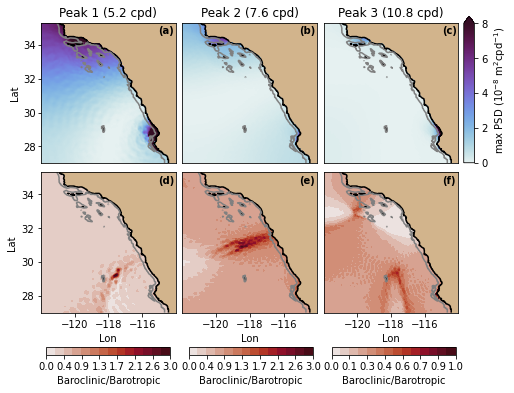

In [10]:
fig = plt.figure(figsize=(7.48,5.5))
gs0 = gridspec.GridSpec(2,3, wspace=0.05, hspace=0.)
ax1 = plt.subplot(gs0[0,0])
ax2 = plt.subplot(gs0[0,1])
ax3 = plt.subplot(gs0[0,2])
ax4 = plt.subplot(gs0[1,0])
ax5 = plt.subplot(gs0[1,1])
ax6 = plt.subplot(gs0[1,2])

cmap =cmo.cm.dense
cmap2 =cmo.cm.amp

for ax in [ax1,ax4]:
    ax.set_ylabel('Lat')
for ax in [ax4,ax5,ax6]:
    ax.set_xlabel('Lon')
for ax in [ax2,ax3,ax5,ax6]:
    ax.set_yticks([])
for ax in [ax1,ax2,ax3]:
    ax.set_xticks([])

# - plot spatial structure of frequency peaks
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lons,lats, 1e8*sshData.p1_psd/(1e4*86400), cmap=cmap, vmin=0, vmax=8)
levels=np.arange(0,80,10)
#cn5 = ax5.contour(lons,lats, sshData.p1_psd, levels, colors='1', alpha=0.5)
ax1.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax1.set_title('Peak 1 (5.2 cpd)')
ax1.set_aspect(1)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(lons,lats, 1e8*sshData.p2_psd/(1e4*86400), cmap=cmap, vmin=0, vmax=8)
levels=np.arange(0,50,10)
#cn6 = ax6.contour(lons,lats, sshData.p2_psd, levels, colors='1', alpha=0.5)
ax2.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax2.set_title('Peak 2 (7.6 cpd)')
ax2.set_aspect(1)

ax3.set_facecolor('tan')
pc3 = ax3.pcolormesh(lons,lats, 1e8*sshData.p3_psd/(1e4*86400), cmap=cmap, vmin=0, vmax=8)
levels=np.arange(0,50,10)
#cn7 = ax7.contour(lons,lats, sshData.p3_psd, levels, colors='1', alpha=0.5)
ax3.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax3.set_title('Peak 3 (10.8 cpd)')
ax3.set_aspect(1)

cbar_ax2 = fig.add_axes([0.91, 0.515, 0.02, 0.37]) 
cb2 = fig.colorbar(pc1,cax=cbar_ax2, orientation='vertical', 
                  format='%1.0f', label='max PSD (10$^{-8}$ m$^2$cpd$^{-1}$)', pad=0,
                  extend='max')
# -------
ax4.set_facecolor('tan')
pc4 = ax4.contourf(lons,lats, sshData.p1_psd/sshData3.p1_psd,
                   cmap=cmap2, levels=np.linspace(0,3,15))
ax4.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax4.set_aspect(1)
cbar_ax4 = fig.add_axes([0.135, 0.03, 0.23, 0.02]) 
cb4 = fig.colorbar(pc4,cax=cbar_ax4, orientation='horizontal', 
                  format='%1.1f', label='Baroclinic/Barotropic', pad=0,
                  extend='max')

ax5.set_facecolor('tan')
pc5 = ax5.contourf(lons,lats, sshData.p2_psd/sshData3.p2_psd,
                   cmap=cmap2, levels=np.linspace(0,3,15))
ax5.contour(lons,lats,depth,levels=[0, 250],
            colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax5.set_aspect(1)
cbar_ax5 = fig.add_axes([0.40, 0.03, 0.23, 0.02]) 
cb5 = fig.colorbar(pc5,cax=cbar_ax5, orientation='horizontal', 
                  format='%1.1f', label='Baroclinic/Barotropic', pad=0,
                  extend='max')


ax6.set_facecolor('tan')
pc6 = ax6.contourf(lons,lats, sshData.p3_psd/sshData3.p3_psd, 
                   cmap=cmap2,levels=np.linspace(0,1,15))
levels=np.arange(0,50,10)
ax6.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax6.set_aspect(1)
cbar_ax6 = fig.add_axes([0.665, 0.03, 0.23, 0.02]) 
cb6 = fig.colorbar(pc6,cax=cbar_ax6, orientation='horizontal', 
                  format='%1.1f', label='Baroclinic/Barotropic', pad=0,
                  extend='max')


ax1.text(0.87,0.92,'(a)',fontweight='bold', fontsize=10, transform=ax1.transAxes)
ax2.text(0.87,0.92,'(b)',fontweight='bold', fontsize=10, transform=ax2.transAxes)
ax3.text(0.88,0.92,'(c)',fontweight='bold', fontsize=10, transform=ax3.transAxes)
ax4.text(0.87,0.92,'(d)',fontweight='bold', fontsize=10, transform=ax4.transAxes)
ax5.text(0.87,0.92,'(e)',fontweight='bold', fontsize=10, transform=ax5.transAxes)
ax6.text(0.88,0.92,'(f)',fontweight='bold', fontsize=10, transform=ax6.transAxes)

for ax in [ax1,ax2,ax3]:
    ax.tick_params(axis='y', which='major', pad=1)

plt.savefig('figure8.png', dpi=500, bbox_inches='tight')

In [11]:
sshData3

<xarray.Dataset>
Dimensions:  (lat: 612, lon: 512)
Coordinates:
  * lon      (lon) float64 -122.0 -122.0 -122.0 -121.9 ... -114.1 -114.0 -114.0
  * lat      (lat) float64 27.01 27.02 27.03 27.05 ... 35.28 35.29 35.3 35.32
Data variables:
    p1_psd   (lat, lon) float64 ...
    p2_psd   (lat, lon) float64 ...
    p3_psd   (lat, lon) float64 ...
    p1_freq  (lat, lon) float64 ...
    p2_freq  (lat, lon) float64 ...
    p3_freq  (lat, lon) float64 ...
Attributes:
    title:        SSH max PSD and frequency of main peaks SVB-no SVB for baro...
    author:       Karina Ramos Musalem
    institution:  ICACC-UNAM
    source:       /notebooks/MITgcm/domain5/ssh_spectra_domain.py
    description:  This file conains the PSD and frequency of the 3 peaks in S...
    timeStamp:    Wed Dec  8 20:16:25 2021

In [12]:
np.max(sshData3.p3_psd/sshData.p3_psd)

<xarray.DataArray 'p3_psd' ()>
array(49.75865327)